In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# load digits

In [2]:
digits=load_digits()

In [4]:
X, y =digits.data, digits.target

In [5]:
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

# check labels in target datasets

In [7]:
set(y)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

# visulization

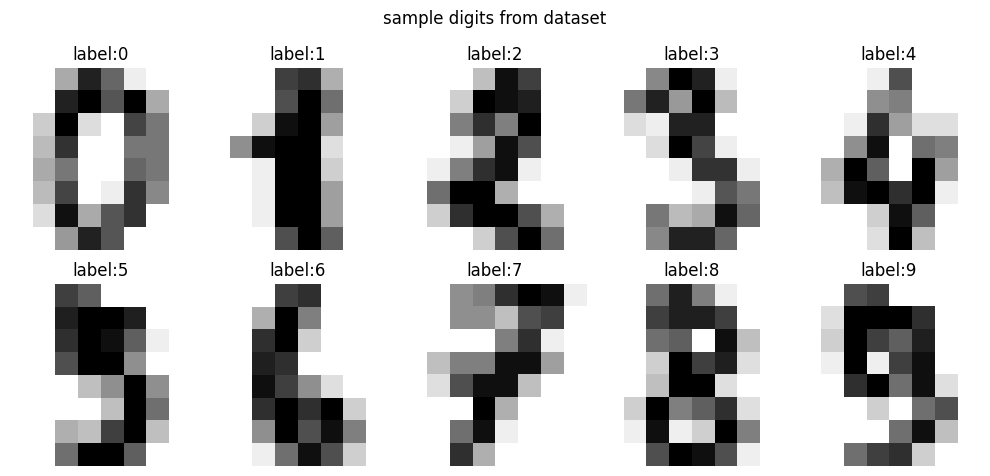

In [14]:
from matplotlib.pyplot import cm #cm stand for colormap
fig, axes=plt.subplots(2,5,figsize=(10,5)) # creating grid of subplot with (2x5) 2 rows and 5 columns total subplot =10
# fig is over all fig and axes is numpy aray 2D
for i,image,label in zip(axes.flatten(),digits.images,digits.target): #axes.flatten() to convert into 1D (2X5 array of matrix ito list of 10 axes), 
    #digit.image contains 8x8 pixcel image of digit, digit.target contains label(0-9), zip() is iterates over axes, one image and one label at time.
    # axes.flatten() is list of subplots ([i,i1,i3......i10]) 
    i.imshow(image,cmap=cm.gray_r) # cm.gray_r is reserved grayscale colormap (higher pixel value look darker)
    #imshow to display image data in subplot
    i.set_title(f"label:{label}")
    i.axis("off")
plt.suptitle("sample digits from dataset",fontsize=12)
plt.tight_layout()# automatically adjust subplot so that not overlap
plt.show()

# copy of above visulization code

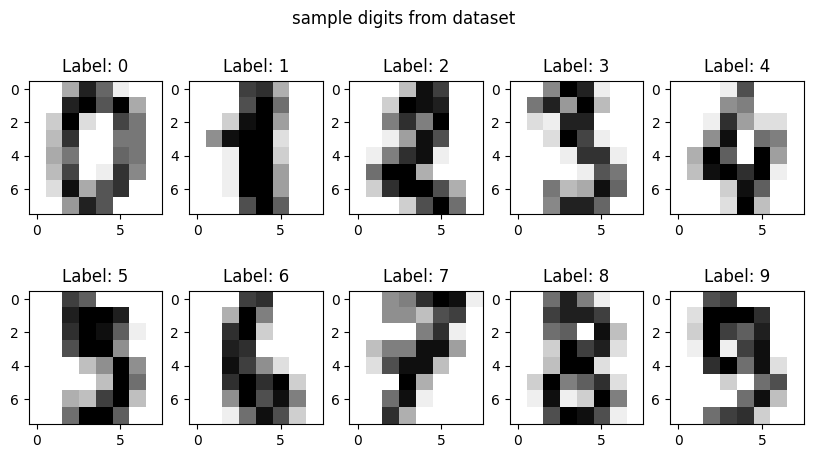

In [22]:
from matplotlib.pyplot import cm # no need again because already imported
#fig, axes =plt.Subplots(2,5,figsize=(10,5)) 
#fig contains whole figure ie big canvas here i am not using it i can use below code
_, axes=plt.subplots(2,5,figsize=(10,5))
for i,image,label in zip(axes.flatten(),digits.images,digits.target):
    i.imshow(image,cm.gist_gray_r)
    i.set_title(f"Label: {label}")

plt.suptitle("sample digits from dataset",fontsize=12)
plt.show()


# feature engineering

In [24]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(X)

# train-test split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=10)

# initialize KNN

In [26]:
knn=KNeighborsClassifier(n_neighbors=5)

 # train model

In [27]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# Prediction

In [28]:
y_pridict=knn.predict(x_test)

# Evaluate

In [29]:
print("accuracy score",accuracy_score(y_test,y_pridict))

accuracy score 0.9638888888888889


In [32]:
print("classification_report")
classification_report(y_test,y_pridict)

classification_report


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        37\n           1       0.94      0.97      0.96        34\n           2       0.97      1.00      0.99        34\n           3       0.95      0.97      0.96        40\n           4       0.97      0.94      0.96        34\n           5       0.94      0.94      0.94        32\n           6       0.97      1.00      0.99        37\n           7       1.00      0.97      0.99        40\n           8       0.91      0.91      0.91        33\n           9       0.97      0.92      0.95        39\n\n    accuracy                           0.96       360\n   macro avg       0.96      0.96      0.96       360\nweighted avg       0.96      0.96      0.96       360\n'

In [33]:
print(classification_report(y_test,y_pridict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.97      0.96        34
           2       0.97      1.00      0.99        34
           3       0.95      0.97      0.96        40
           4       0.97      0.94      0.96        34
           5       0.94      0.94      0.94        32
           6       0.97      1.00      0.99        37
           7       1.00      0.97      0.99        40
           8       0.91      0.91      0.91        33
           9       0.97      0.92      0.95        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



# visualization of confusion metrix

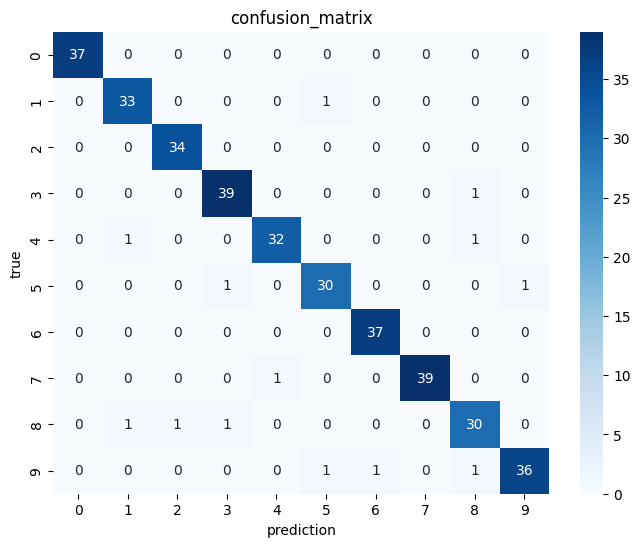

In [41]:
con_m=confusion_matrix(y_test,y_pridict)
plt.figure(figsize=(8,6))
sns.heatmap(con_m,
            annot=True,#annot=True means write the number inside the box
            fmt="d", #format number as integer insted of float
            cmap="Blues",# color map (light->dark blue)
            #xticklabels=digits.target_names, #labels of x-axis (predicted class) 
            #yticklabels=digits.target_names) # label of y-axis (true class)
)
plt.xlabel("prediction")
plt.ylabel("true")
plt.title("confusion_matrix")
plt.show()

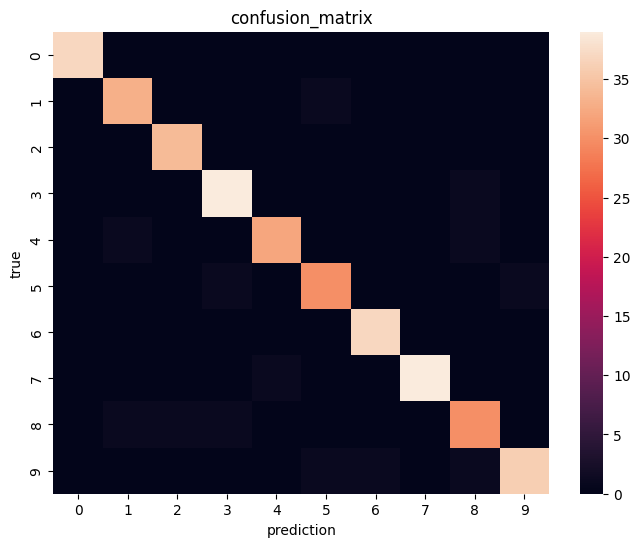

In [36]:
con_m=confusion_matrix(y_test,y_pridict)
plt.figure(figsize=(8,6))
sns.heatmap(con_m,annot=False)#annot=True means write the number inside the box
plt.xlabel("prediction")
plt.ylabel("true")
plt.title("confusion_matrix")
plt.show()

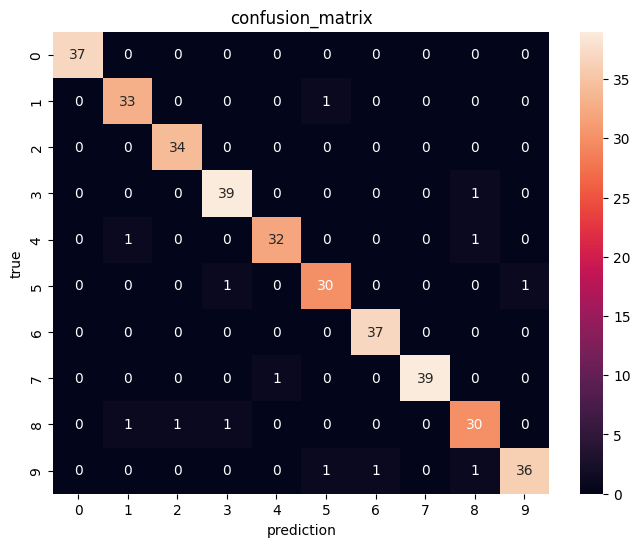

In [42]:
con_m=confusion_matrix(y_test,y_pridict)
plt.figure(figsize=(8,6))
sns.heatmap(con_m,annot=True)#annot=True means write the number inside the box
plt.xlabel("prediction")
plt.ylabel("true")
plt.title("confusion_matrix")
plt.show()

# want to show some prediction with image

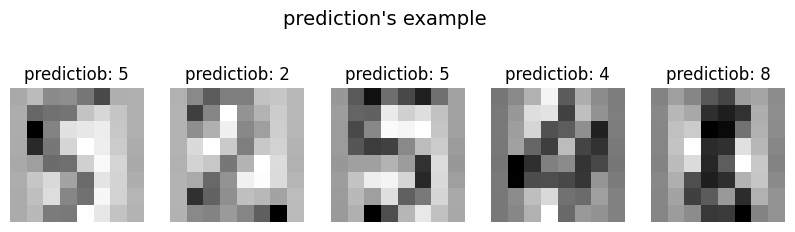

In [ ]:
_, axes = plt.subplots(1,5,figsize=(10,3))
for i,image,prediction in zip(axes,x_test,y_pridict):#(5,)   # 1D NumPy array of 5 AxesSubplot objects, can run "for ax in axes"
    i.imshow(image.reshape(8,8),cmap=plt.cm.gray_r)
    i.set_title(f"predictiob: {prediction}")
    i.axis("off")
plt.suptitle("prediction's example",fontsize=14)
plt.show()


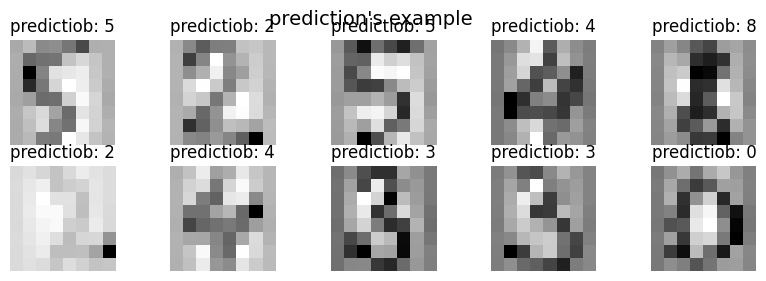

In [ ]:
_, axes = plt.subplots(2,5,figsize=(10,3))
for i,image,prediction in zip(axes.flatten(),x_test,y_pridict):#(2, 5)it is 2D NumPy array, 
    # Flattening converts the 2D grid of axes into a 1D array, so looping is easier.
    i.imshow(image.reshape(8,8),cmap=plt.cm.gray_r)
    i.set_title(f"predictiob: {prediction}")
    i.axis("off")
plt.suptitle("prediction's example",fontsize=14)
plt.show()

In [51]:
# #Grid size	axes shape	Flatten needed?
# 1 row × N columns	(N,)	No
# M rows × N columns	(M, N)	Yes